importing required libraries

In [87]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
import matplotlib.pyplot as plt
import os
import seaborn as sns 
import datetime
import pickle


%matplotlib inline


importing the dataset

In [90]:
data1 = pd.read_csv('C:/Users/kiran/Downloads/Customer - Churn Prediction/Dataset/ml_case_training_data.csv')
data2 = pd.read_csv('C:/Users/kiran/Downloads/Customer - Churn Prediction/Dataset/ml_case_training_hist_data.csv')
data3 = pd.read_csv('C:/Users/kiran/Downloads/Customer - Churn Prediction/Dataset/ml_case_training_output.csv')

In [91]:
data1.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [92]:
data1.shape

(16096, 32)

In [93]:
data2.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [94]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

Checking for null value percentage for each column. we can remove the columns that have more than 75 percent of null vaues. 

we check this for all three data frames. 

In [95]:
(data1.isna().mean().round(4) * 100 )


id                            0.00
activity_new                 59.30
campaign_disc_ele           100.00
channel_sales                26.21
cons_12m                      0.00
cons_gas_12m                  0.00
cons_last_month               0.00
date_activ                    0.00
date_end                      0.01
date_first_activ             78.21
date_modif_prod               0.98
date_renewal                  0.25
forecast_base_bill_ele       78.21
forecast_base_bill_year      78.21
forecast_bill_12m            78.21
forecast_cons                78.21
forecast_cons_12m             0.00
forecast_cons_year            0.00
forecast_discount_energy      0.78
forecast_meter_rent_12m       0.00
forecast_price_energy_p1      0.78
forecast_price_energy_p2      0.78
forecast_price_pow_p1         0.78
has_gas                       0.00
imp_cons                      0.00
margin_gross_pow_ele          0.08
margin_net_pow_ele            0.08
nb_prod_act                   0.00
net_margin          

In [96]:
data2.isna().mean().round(4) * 100

id              0.0
price_date      0.0
price_p1_var    0.7
price_p2_var    0.7
price_p3_var    0.7
price_p1_fix    0.7
price_p2_fix    0.7
price_p3_fix    0.7
dtype: float64

In [97]:
data3.isna().mean()

id       0.0
churn    0.0
dtype: float64

In [98]:
print(data3.shape)
print(data1.shape)
print(data3.id.nunique())
print(data1.id.nunique())
print(data1.columns)
print(data3.columns)

(16096, 2)
(16096, 32)
16096
16096
Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max'],
      dtype='object')
Index(['id', 'churn'], dtype='object')


Merging data1 and data3. to draw meaning full insights and to gain more information about the customer chrun data. 

In [99]:
data4 = pd.merge(data1, data3)

In [100]:
data4.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

Checking for duplicates values in data1 and data2 dataframes


In [101]:
data1.loc[data1.duplicated(keep='first'), :]

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max


In [102]:
data2.loc[data2.duplicated(keep='first'), :]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix


Handling missing values as we have few columns that have more than 75 percent null values we can remove the columns and for remaining null values which are less than 1 percent we can drop the rows from the data frame. 

data1 has the following columnswith more than 75 percent missing values and all the others has less than 1 percent of missing values. 

date_first_activ, campaign_disc_ele, forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m, forecast_cons




In [103]:
data_churn = data4[["id", "churn"]]

In [104]:
#data_churn.plot(kind = 'bar', stacked = True, figsize = (18, 10), title = "Churn and Non-Churn")
data_churn.columns = ["company_id", "churn"]

<AxesSubplot:>

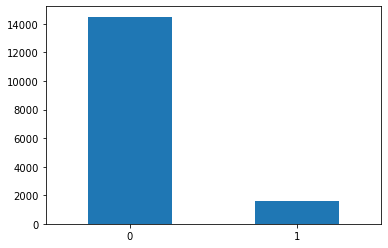

In [105]:
data_churn["churn"].value_counts().plot(kind = "bar", rot = 0)


Visualization to see customer churn percentage. 

In [106]:
def churn_stacked(dataframe, title_, size_ = (18, 10), rot_ = 0, legend_ = "upper right"):
    
    """
    ploting the stacked bar chart for the churn data    
    """
    
    ax = dataframe.plot(kind = 'bar', stacked = True, figsize = size_, rot = rot_, title = title_)
    detail_stackbarchart(ax, textsize = 13)
    plt.legend(["not churn", "churn"], loc = legend_)
    plt.ylabel("company")
    plt.show()
    
    
def detail_stackbarchart(ax, pad = 0.99, colour = "white", textsize = 13):
    for p in ax.patches:
        value = str(round(p.get_height(), 1))
        if value == '0.0':
            continue
        ax.annotate(value, 
                    ((p.get_x()+p.get_width()/2) * pad-0.05, (p.get_y()+p.get_height()/2) * pad),
                     color = colour,
                     size = textsize
                )
        
    
    
    

In [107]:
#churn_total = churn.groupby(churn["churn"]).count()
#churn_percentage = churn_total/churn_total.sum()*10


churn_count = data_churn.groupby(data_churn["churn"]).count()
percentage_churn = churn_count/churn_count.sum()*100



In [108]:
print(churn_count)
print(percentage_churn)

       company_id
churn            
0           14501
1            1595
       company_id
churn            
0       90.090706
1        9.909294


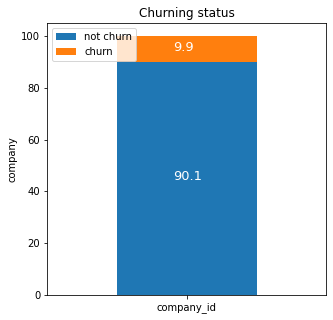

In [109]:
churn_stacked(percentage_churn.transpose(),"Churning status", (5,5), legend_="upper left")

From the Above figure it is clear that the 90 percentage of customer retanined with the company. this indicate that company is performing well. 

Checking the relation between the company activity and the possibility of them existing the contract. 

In [110]:
company_activity = data4[["id","activity_new", "churn"]]

In [111]:
company_activity = company_activity.groupby([company_activity["activity_new"],
                   company_activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

In [112]:
print(company_activity)

churn                                  0     1
activity_new                                  
apdekpcbwosbxepsfxclislboipuxpop  1484.0  93.0
kkklcdamwfafdcfwofuscwfwadblfmce   384.0  38.0
kwuslieomapmswolewpobpplkaooaaew   200.0  30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb   187.0  32.0
ckfxocssowaeipxueikxcmaxdmcduxsa   176.0  13.0
...                                  ...   ...
opoiuuwdmxdssidluooopfswlkkkcsxf     NaN   1.0
pfcocskbxlmofswiflsbcefcpufbopuo     NaN   2.0
wceaopxmdpccxfmcdpopulcaubcxibuw     NaN   1.0
wkwdccuiboaeaalcaawlwmldiwmpewma     NaN   1.0
xwkaesbkfsacseixxksofpddwfkbobki     NaN   1.0

[419 rows x 2 columns]


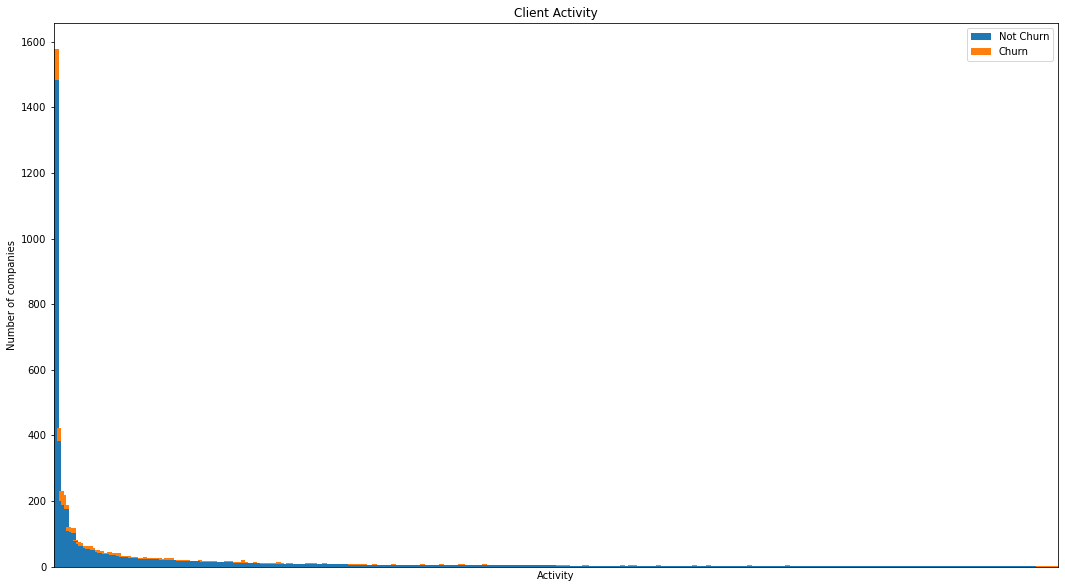

In [113]:
company_activity.plot(kind="bar", figsize=(18, 10), width=2, stacked=True, title="Client Activity")

# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Not Churn", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()

from the above graph it is clear that higher the activity higher the chances of retentation. 

it is also clear the data is right skewed and there are null values and outliers, in the next few steps we will try to fill null values and handle outliers.

In [114]:
total_company_activity = company_activity.fillna(0)[0]+company_activity.fillna(0)[1]

In [115]:
total_company_activity.isnull().any()

False

In [116]:
company_activity_percentage = company_activity.fillna(0)[1]/(total_company_activity)*100


pd.DataFrame({"Percentage churn": company_activity_percentage, "Total companies": total_company_activity }).sort_values(by="Percentage churn",
 ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


Analysing the churn data to the sales channel. 

In [117]:
churn_channel = data4[["id","channel_sales", "churn"]]


churn_channel = churn_channel.groupby([churn_channel["channel_sales"], churn_channel["churn"]])["id"].count().unstack(level=1).fillna(0)


In [118]:
print(churn_channel)

churn                                  0      1
channel_sales                                  
epumfxlbckeskwekxbiuasklxalciiuu     4.0    0.0
ewpakwlliwisiwduibdlfmalxowmwpci   884.0   82.0
fixdbufsefwooaasfcxdxadsiekoceaa     2.0    0.0
foosdfpfkusacimwkcsosbicdxkicaua  6455.0  922.0
lmkebamcaaclubfxadlmueccxoimlema  1957.0  116.0
sddiedcslfslkckwlfkdpoeeailfpeds    12.0    0.0
usilxuppasemubllopkaafesmlibmsdf  1294.0  150.0


In [119]:
channelper_churn = (churn_channel.div(churn_channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

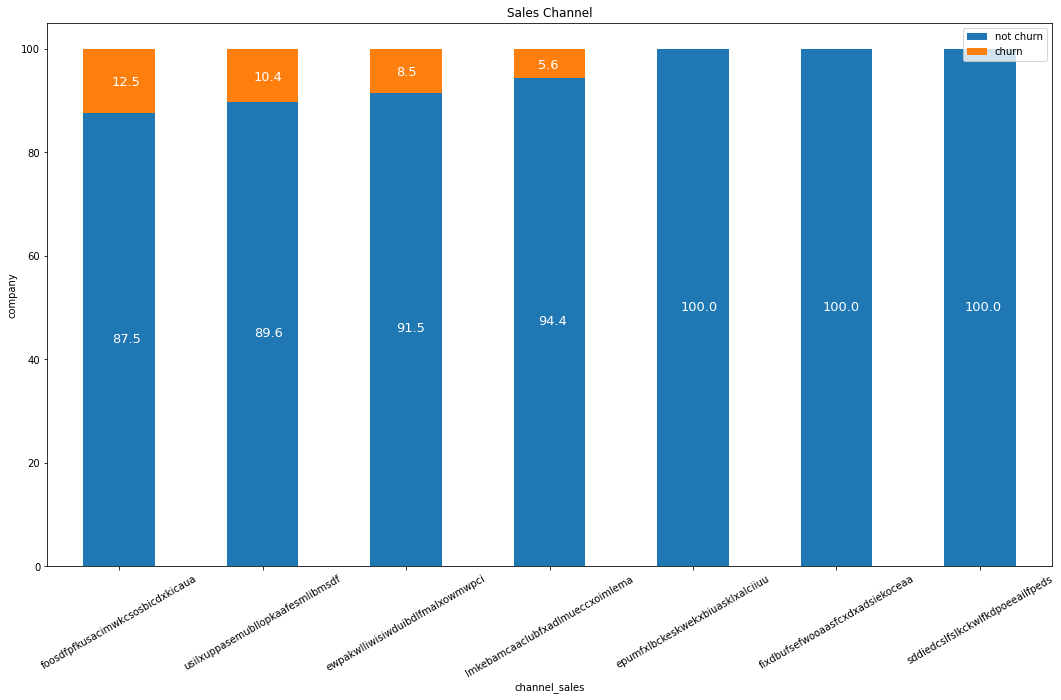

In [120]:
churn_stacked(channelper_churn, "Sales Channel", rot_=30)

To state from the above figure there is no relationship between sales channel and churn

checking consumption vs churn

In [121]:
churn_consumption = data4[["id", "cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

creating a function that plot the distribution of the individual consumption

In [122]:
def distribution_plot(dataframe, column, ax, bins_ = 50):
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"not churn": dataframe[dataframe["churn"]==0][column],
                         "churn": dataframe[dataframe["churn"] == 1][column]})
    
    temp[["not churn", "churn"]].plot(kind = 'hist', bins = bins_ , ax = ax, stacked = True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style="plain", axis = 'x')
    
    

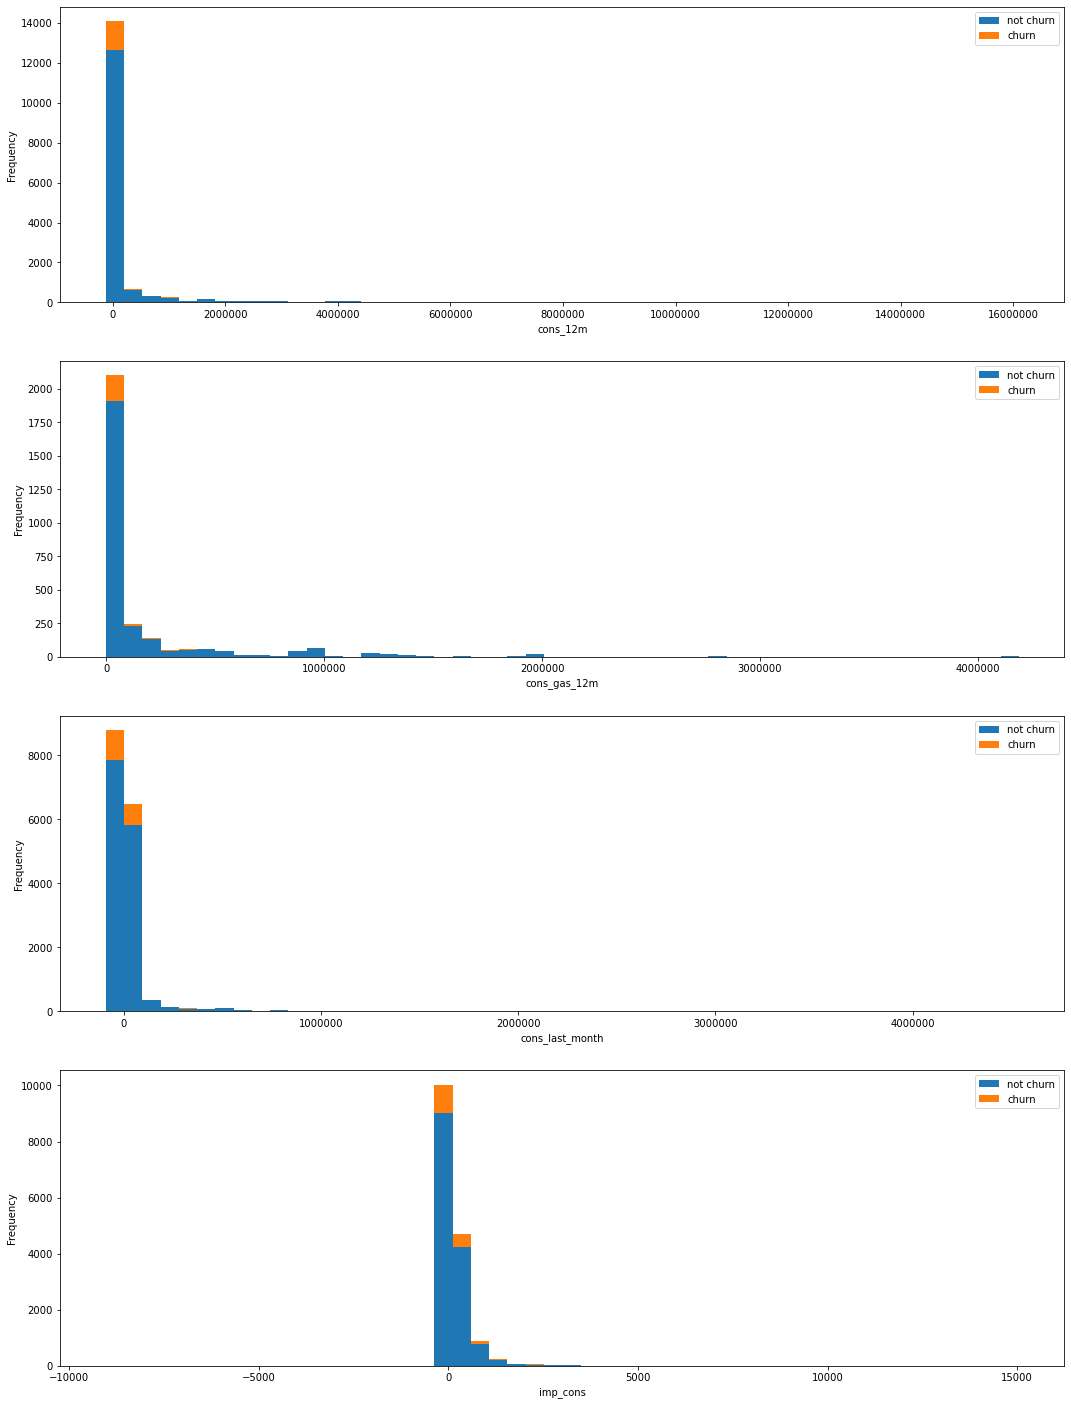

In [123]:
fig, axs = plt.subplots(nrows=4, figsize = (18, 25))

distribution_plot(churn_consumption, "cons_12m", axs[0])


distribution_plot(churn_consumption[churn_consumption["has_gas"] == "t"], "cons_gas_12m", axs[1])
distribution_plot(churn_consumption, "cons_last_month", axs[2])
distribution_plot(churn_consumption, "imp_cons", axs[3])

As the graph above is right skewed it might be because of outlier, now let us plot boxplot to know the distribution of outliers. 

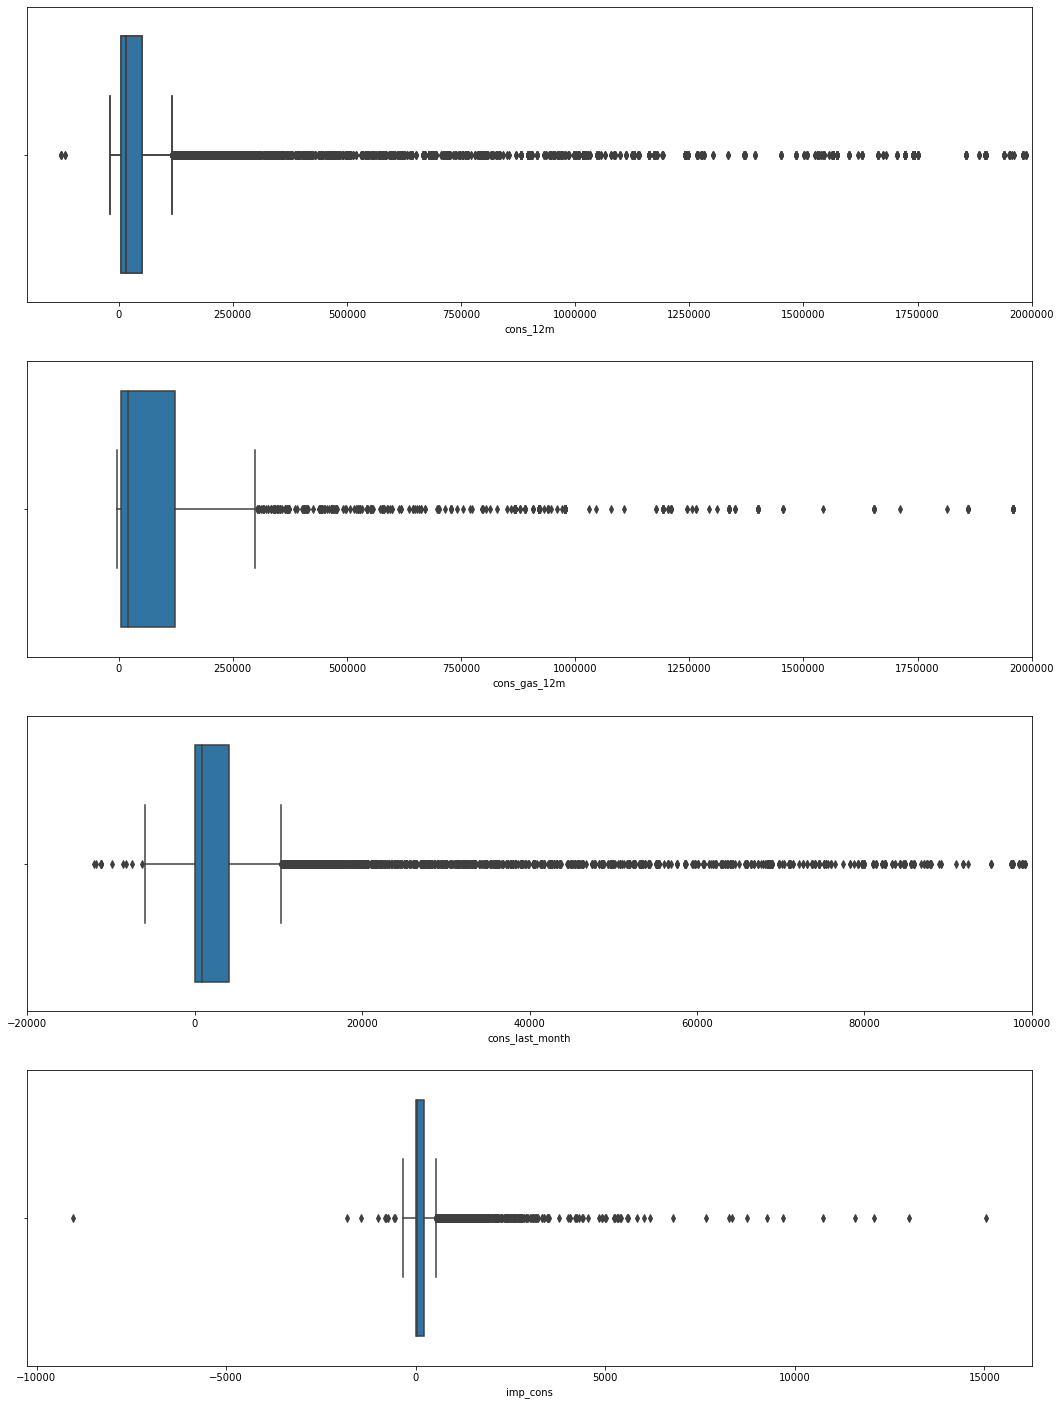

In [124]:
fig, axs = plt.subplots(nrows = 4, figsize = (18, 25))

sns.boxplot(x = churn_consumption["cons_12m"], ax = axs[0])

sns.boxplot(x = churn_consumption["cons_12m"], ax=axs[0])
sns.boxplot(x = churn_consumption[churn_consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x = churn_consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x = churn_consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
 ax.ticklabel_format(style = 'plain', axis = 'x')
# Set x-axis limit
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)
plt.show()

there are several outliers. 

dealing with the dates

In [125]:
churn_dates = data4[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()


In [126]:
churn_dates["date_activ"] = pd.to_datetime(churn_dates["date_activ"], format='%Y-%m-%d')
churn_dates["date_end"] = pd.to_datetime(churn_dates["date_end"], format='%Y-%m-%d')
churn_dates["date_modif_prod"] = pd.to_datetime(churn_dates["date_modif_prod"], format='%Y-%m-%d')
churn_dates["date_renewal"] = pd.to_datetime(churn_dates["date_renewal"], format='%Y-%m-%d')

In [127]:
churn_dates.head()

,id,date_activ,date_end,date_modif_prod,date_renewal,churn
0,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
1,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,NaT,2015-06-23,1
2,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0
3,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0
4,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0


In [128]:
def plot_churn_date(dataframe, column, fontsize = 12):
    temp = dataframe[[column,
                      "churn",
                       "id"]].set_index(column).groupby([pd.Grouper(freq = 'M'), "churn"]).count().unstack(level = 1)
    ax = temp.plot(kind = "bar", stacked = True, figsize = (18, 10), rot = 0)
    ax.set_xticklabels(map(lambda x: format_plot(x), temp.index))
    plt.xticks(fontsize = fontsize)
    plt.ylabel("Number of companies")
    plt.legend(["non-churn", "churn"], loc = "upper left")
    plt.show()

In [129]:
def format_plot(label):
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month

In [130]:
churn_dates[["date_activ", "id", "churn"]].set_index("date_activ").groupby([pd.Grouper(freq = 'M'), "churn"]).count().unstack(level=1)

id     
churn          0    1
date_activ           
2000-07-31   1.0  NaN
2001-02-28   1.0  NaN
2003-05-31   1.0  NaN
2003-06-30   2.0  1.0
2003-07-31   8.0  NaN
...          ...  ...
2013-07-31  18.0  2.0
2013-08-31   5.0  2.0
2013-10-31   2.0  NaN
2013-11-30   1.0  1.0
2014-09-30   1.0  NaN

[125 rows x 2 columns]

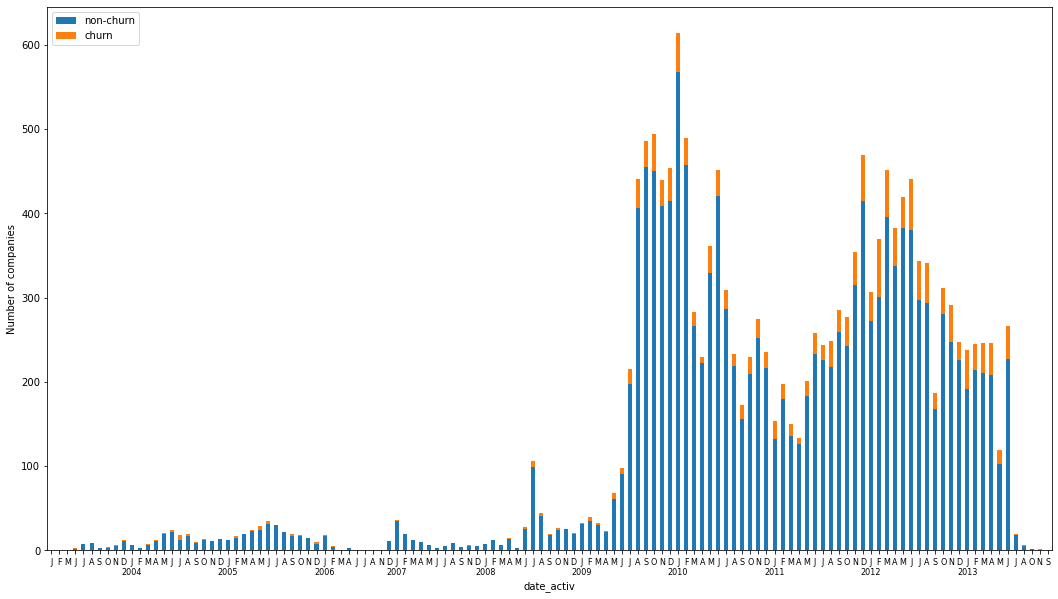

In [131]:
plot_churn_date(churn_dates, "date_activ", fontsize = 8)

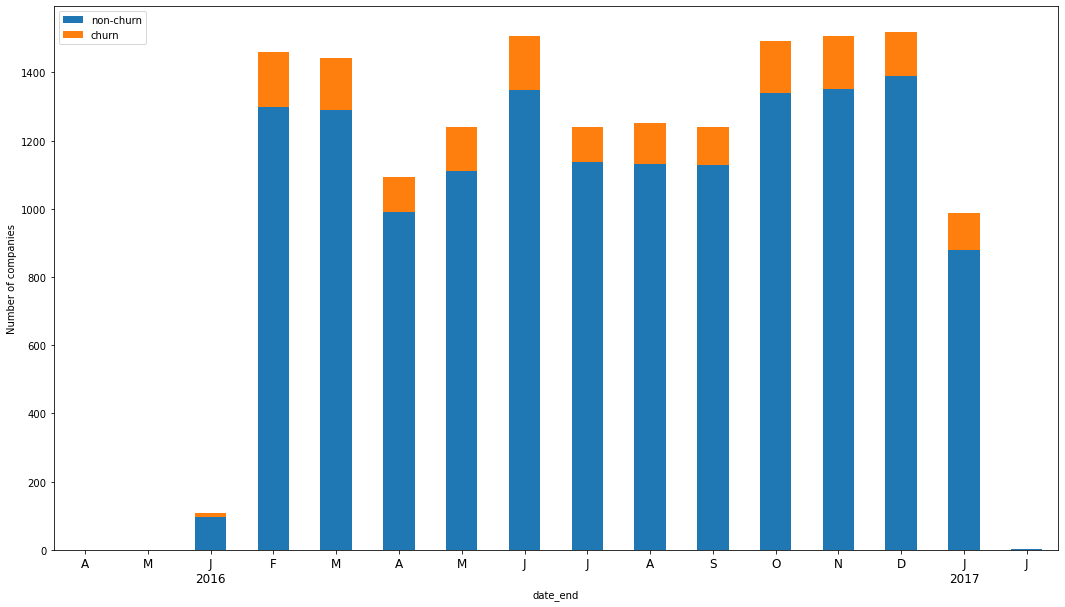

In [132]:
plot_churn_date(churn_dates, "date_end")

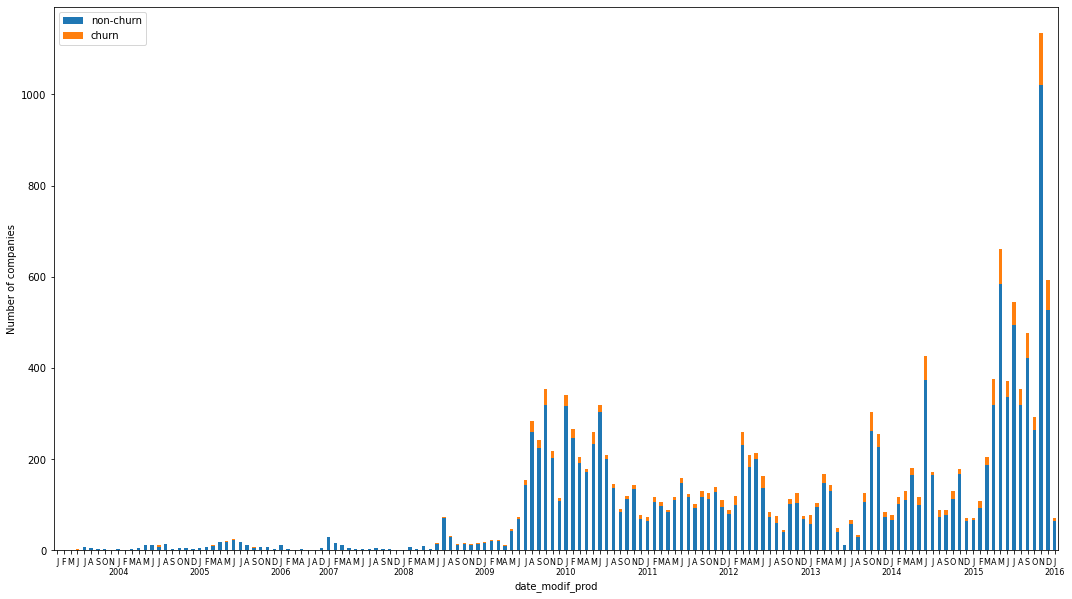

In [133]:
plot_churn_date(churn_dates, "date_modif_prod", fontsize=8)

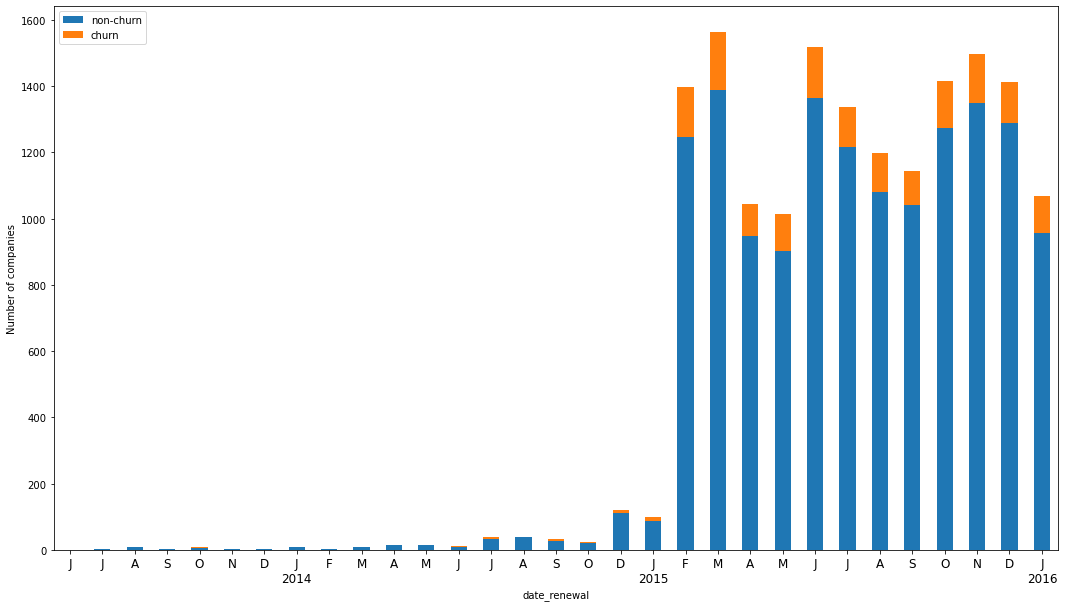

In [134]:

plot_churn_date(churn_dates, "date_renewal")

In [135]:
churn_forecast = data4[["id","forecast_base_bill_ele","forecast_base_bill_year",
 "forecast_bill_12m","forecast_cons","forecast_cons_12m",
 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
 "forecast_price_energy_p1","forecast_price_energy_p2",
 "forecast_price_pow_p1","churn"]]

In [136]:
churn_forecast.head()

,id,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,churn
0,48ada52261e7cf58715202705a0451c9,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0


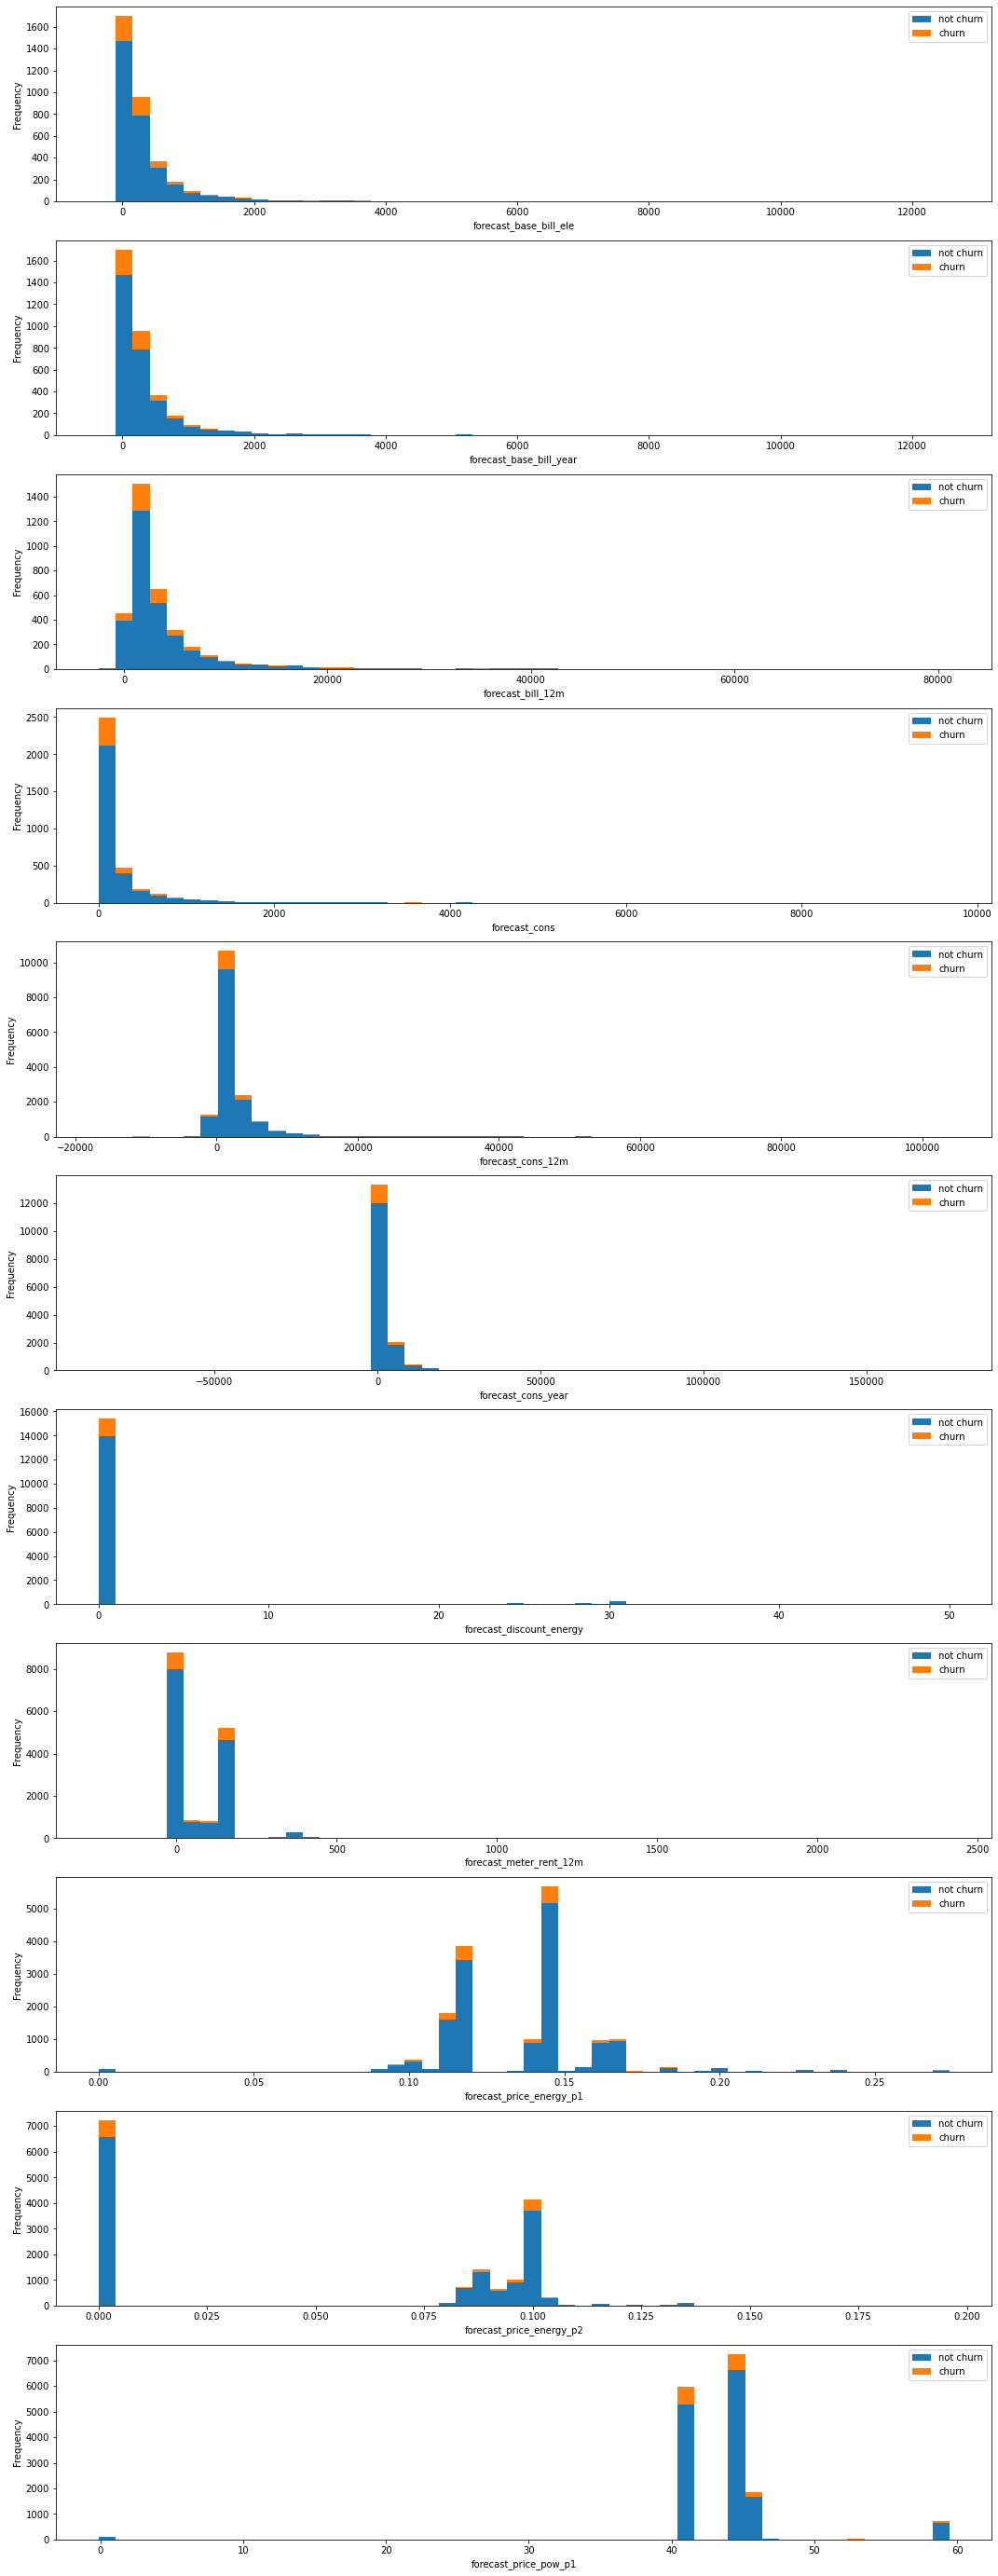

In [137]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
distribution_plot(data4, "forecast_base_bill_ele", axs[0])
distribution_plot(data4, "forecast_base_bill_year", axs[1])
distribution_plot(data4, "forecast_bill_12m", axs[2])
distribution_plot(data4, "forecast_cons", axs[3])
distribution_plot(data4, "forecast_cons_12m", axs[4])
distribution_plot(data4, "forecast_cons_year", axs[5])
distribution_plot(data4, "forecast_discount_energy", axs[6])
distribution_plot(data4, "forecast_meter_rent_12m", axs[7])
distribution_plot(data4, "forecast_price_energy_p1", axs[8])
distribution_plot(data4, "forecast_price_energy_p2", axs[9])
distribution_plot(data4, "forecast_price_pow_p1", axs[10])

churn based on the consumption

In [139]:
consumption_churn = data4[["id", "has_gas", "churn"]]


In [140]:
consumption_churn.head()

,id,has_gas,churn
0,48ada52261e7cf58715202705a0451c9,f,0
1,24011ae4ebbe3035111d65fa7c15bc57,t,1
2,d29c2c54acc38ff3c0614d0a653813dd,f,0
3,764c75f661154dac3a6c254cd082ea7d,f,0
4,bba03439a292a1e166f80264c16191cb,f,0


In [141]:
consumption_churn = consumption_churn.groupby([consumption_churn["churn"],
             consumption_churn["has_gas"]])["id"].count().unstack(level=0)


In [142]:
percentage_contract = (consumption_churn.div(consumption_churn.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

In [143]:
percentage_contract.head()

churn,0,1
has_gas,,
f,89.636004,10.363996
t,92.105263,7.894737


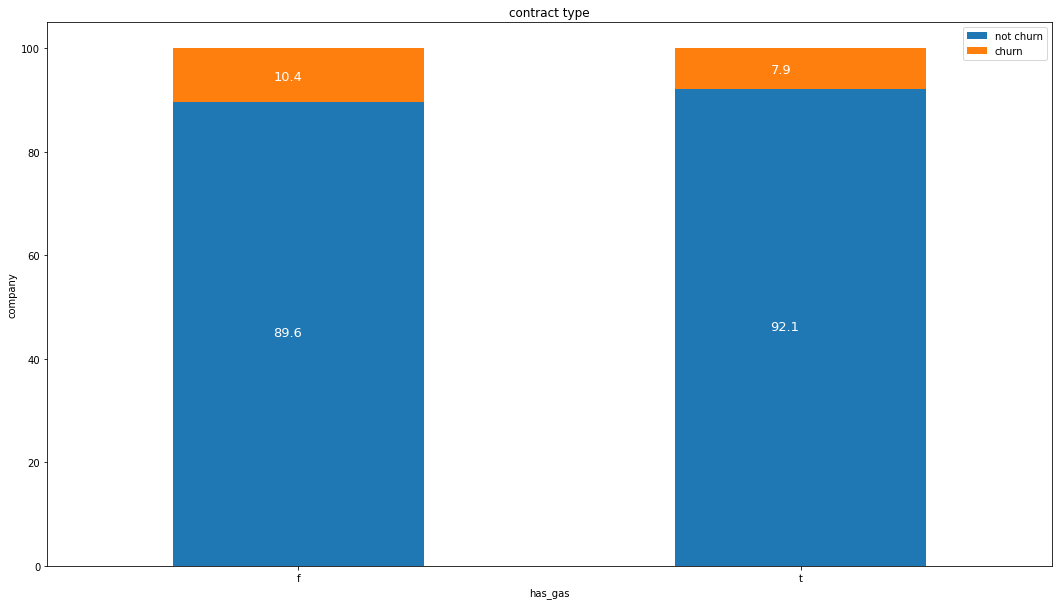

In [144]:
churn_stacked(percentage_contract, "contract type")

In [145]:
churn_margin = data4[["id", "margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]

<AxesSubplot:xlabel='net_margin'>

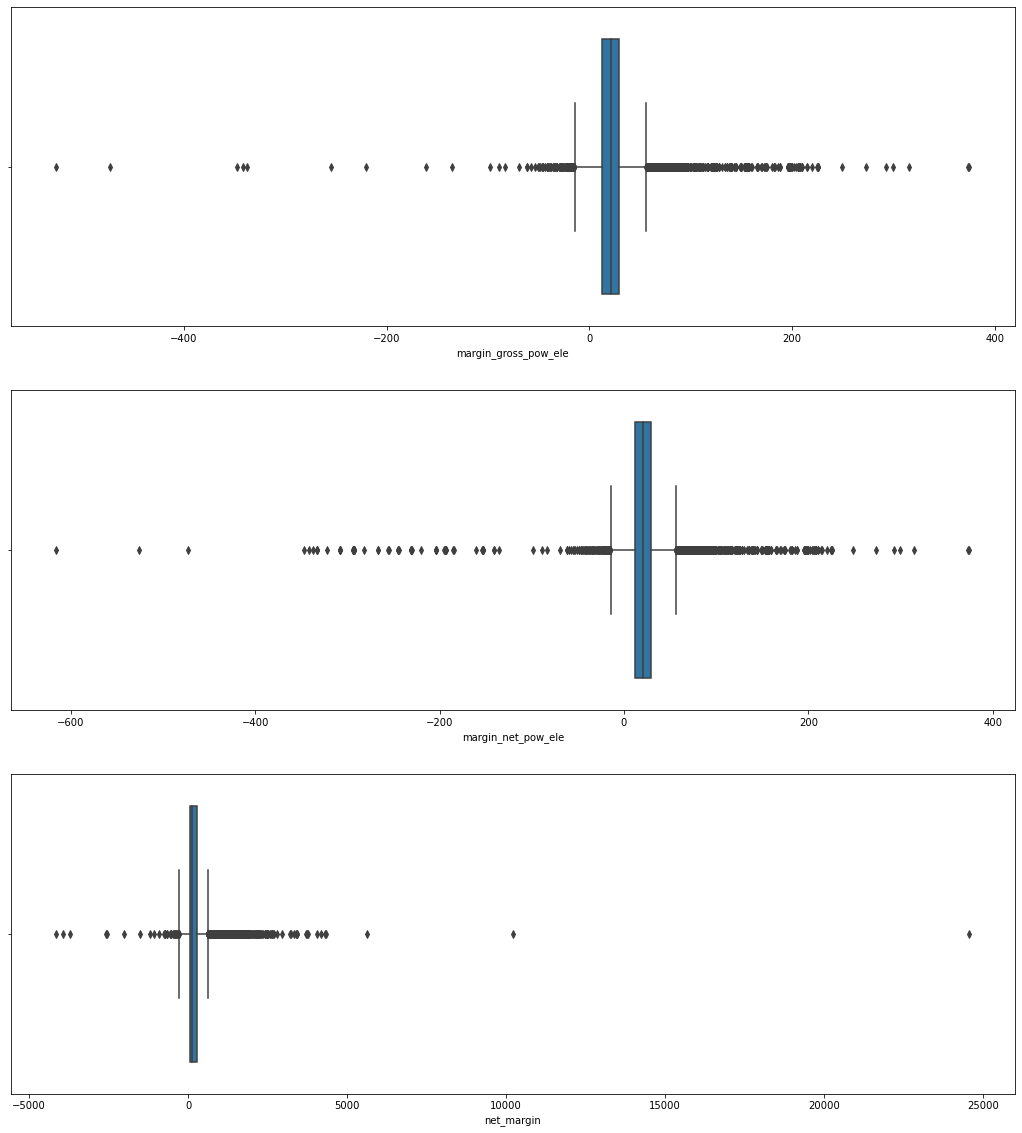

In [146]:
fig, axs = plt.subplots(nrows = 3, figsize = (18, 20))

sns.boxplot(x = churn_margin["margin_gross_pow_ele"], ax = axs[0])
sns.boxplot(x = churn_margin["margin_net_pow_ele"], ax = axs[1])
sns.boxplot(x = churn_margin["net_margin"], ax = axs[2])


In [147]:
churn_power = data4[["id", "pow_max", "churn"]].fillna(0)

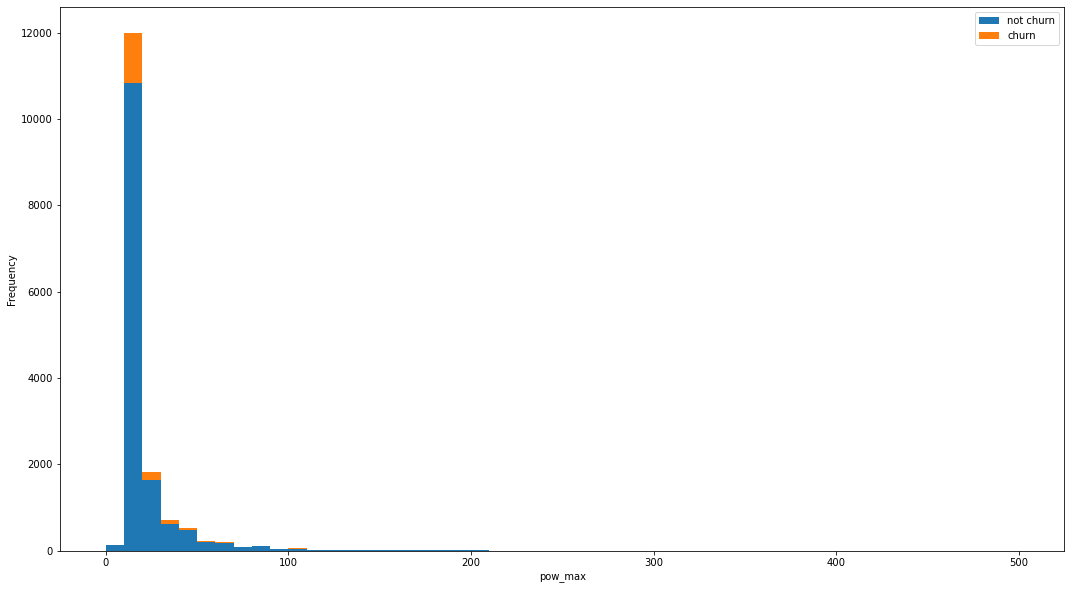

In [148]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 10))

distribution_plot(churn_power, "pow_max", axs)

In [149]:
data4.drop(columns=["campaign_disc_ele", "date_first_activ",
 "forecast_base_bill_ele","forecast_base_bill_year",
"forecast_bill_12m", "forecast_cons"], inplace=True)

In [150]:
data4.loc[data4["date_modif_prod"].isnull(),"date_modif_prod"] = data4["date_modif_prod"].value_counts().index[0]
data4.loc[data4["date_end"].isnull(),"date_end"] = data4["date_end"].value_counts().index[0]
data4.loc[data4["date_renewal"].isnull(),"date_renewal"] = data4["date_renewal"].value_counts().index[0]


GridSpec(6, 6)

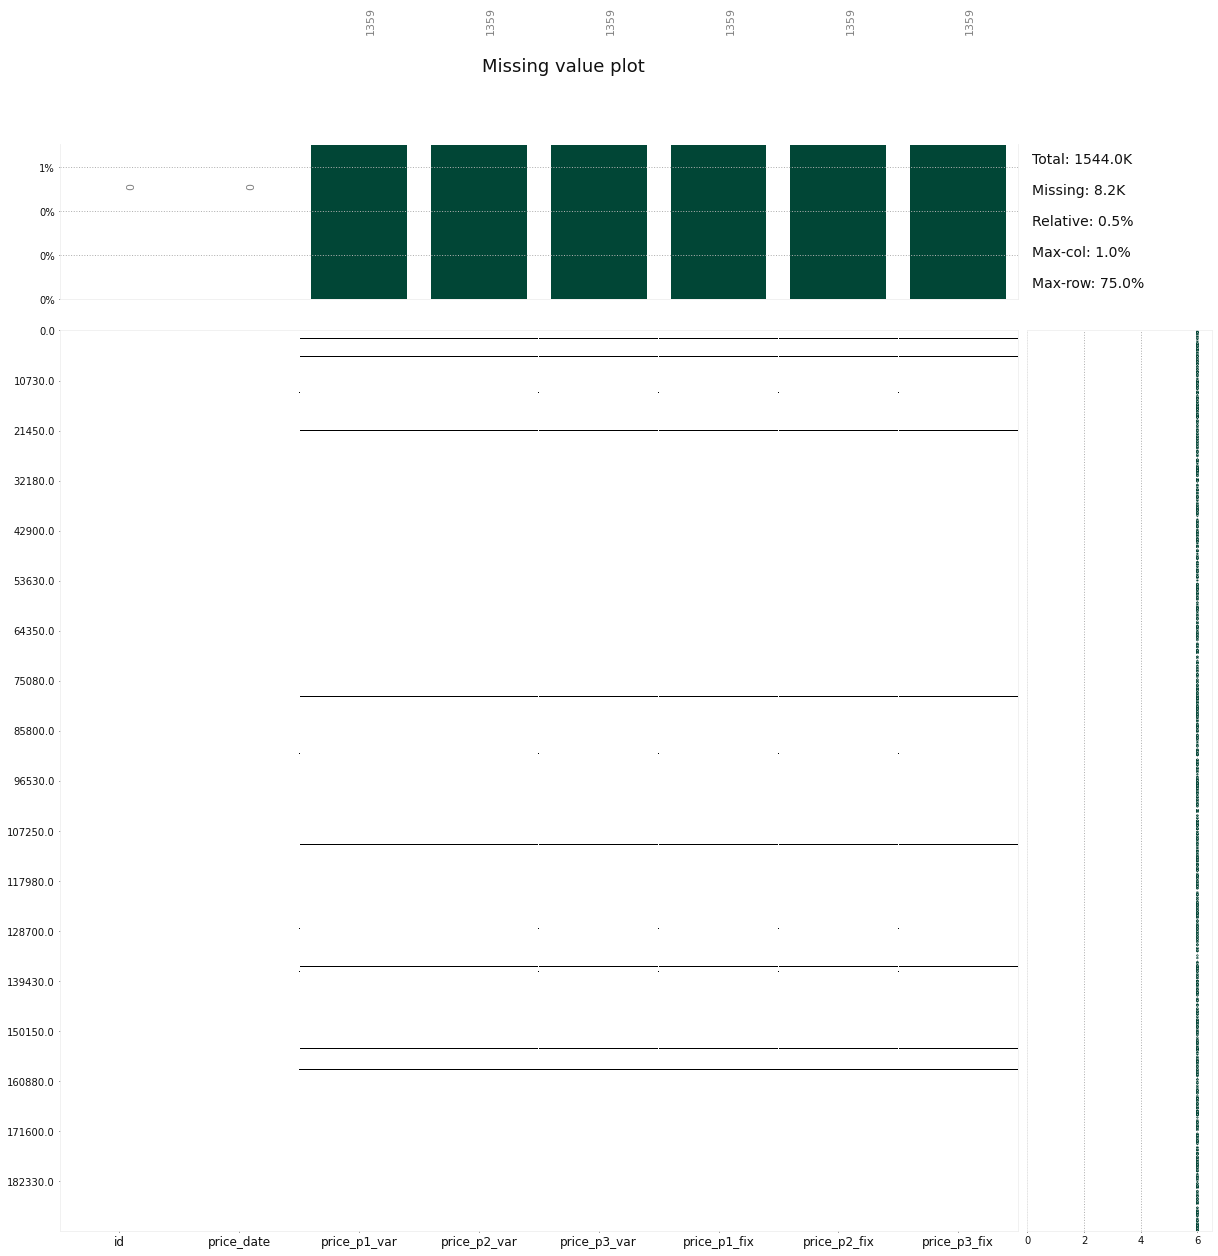

In [151]:
import klib

klib.missingval_plot(data2)

In [152]:
data2.loc[data2["price_p1_var"].isnull(),"price_p1_var"] = data2["price_p1_var"].median()
data2.loc[data2["price_p2_var"].isnull(),"price_p2_var"] = data2["price_p2_var"].median()
data2.loc[data2["price_p3_var"].isnull(),"price_p3_var"] = data2["price_p3_var"].median()
data2.loc[data2["price_p1_fix"].isnull(),"price_p1_fix"] = data2["price_p1_fix"].median()
data2.loc[data2["price_p2_fix"].isnull(),"price_p2_fix"] = data2["price_p2_fix"].median()
data2.loc[data2["price_p3_fix"].isnull(),"price_p3_fix"] = data2["price_p3_fix"].median()

In [153]:
data2.isnull().any()

id              False
price_date      False
price_p1_var    False
price_p2_var    False
price_p3_var    False
price_p1_fix    False
price_p2_fix    False
price_p3_fix    False
dtype: bool

In [154]:
data4["date_activ"] = pd.to_datetime(data4["date_activ"], format='%Y-%m-%d')
data4["date_end"] = pd.to_datetime(data4["date_end"], format='%Y-%m-%d')
data4["date_modif_prod"] = pd.to_datetime(data4["date_modif_prod"], format='%Y-%m-%d')
data4["date_renewal"] = pd.to_datetime(data4["date_renewal"], format='%Y-%m-%d')


In [155]:
data2["price_date"] = pd.to_datetime(data2["price_date"], format='%Y-%m-%d')

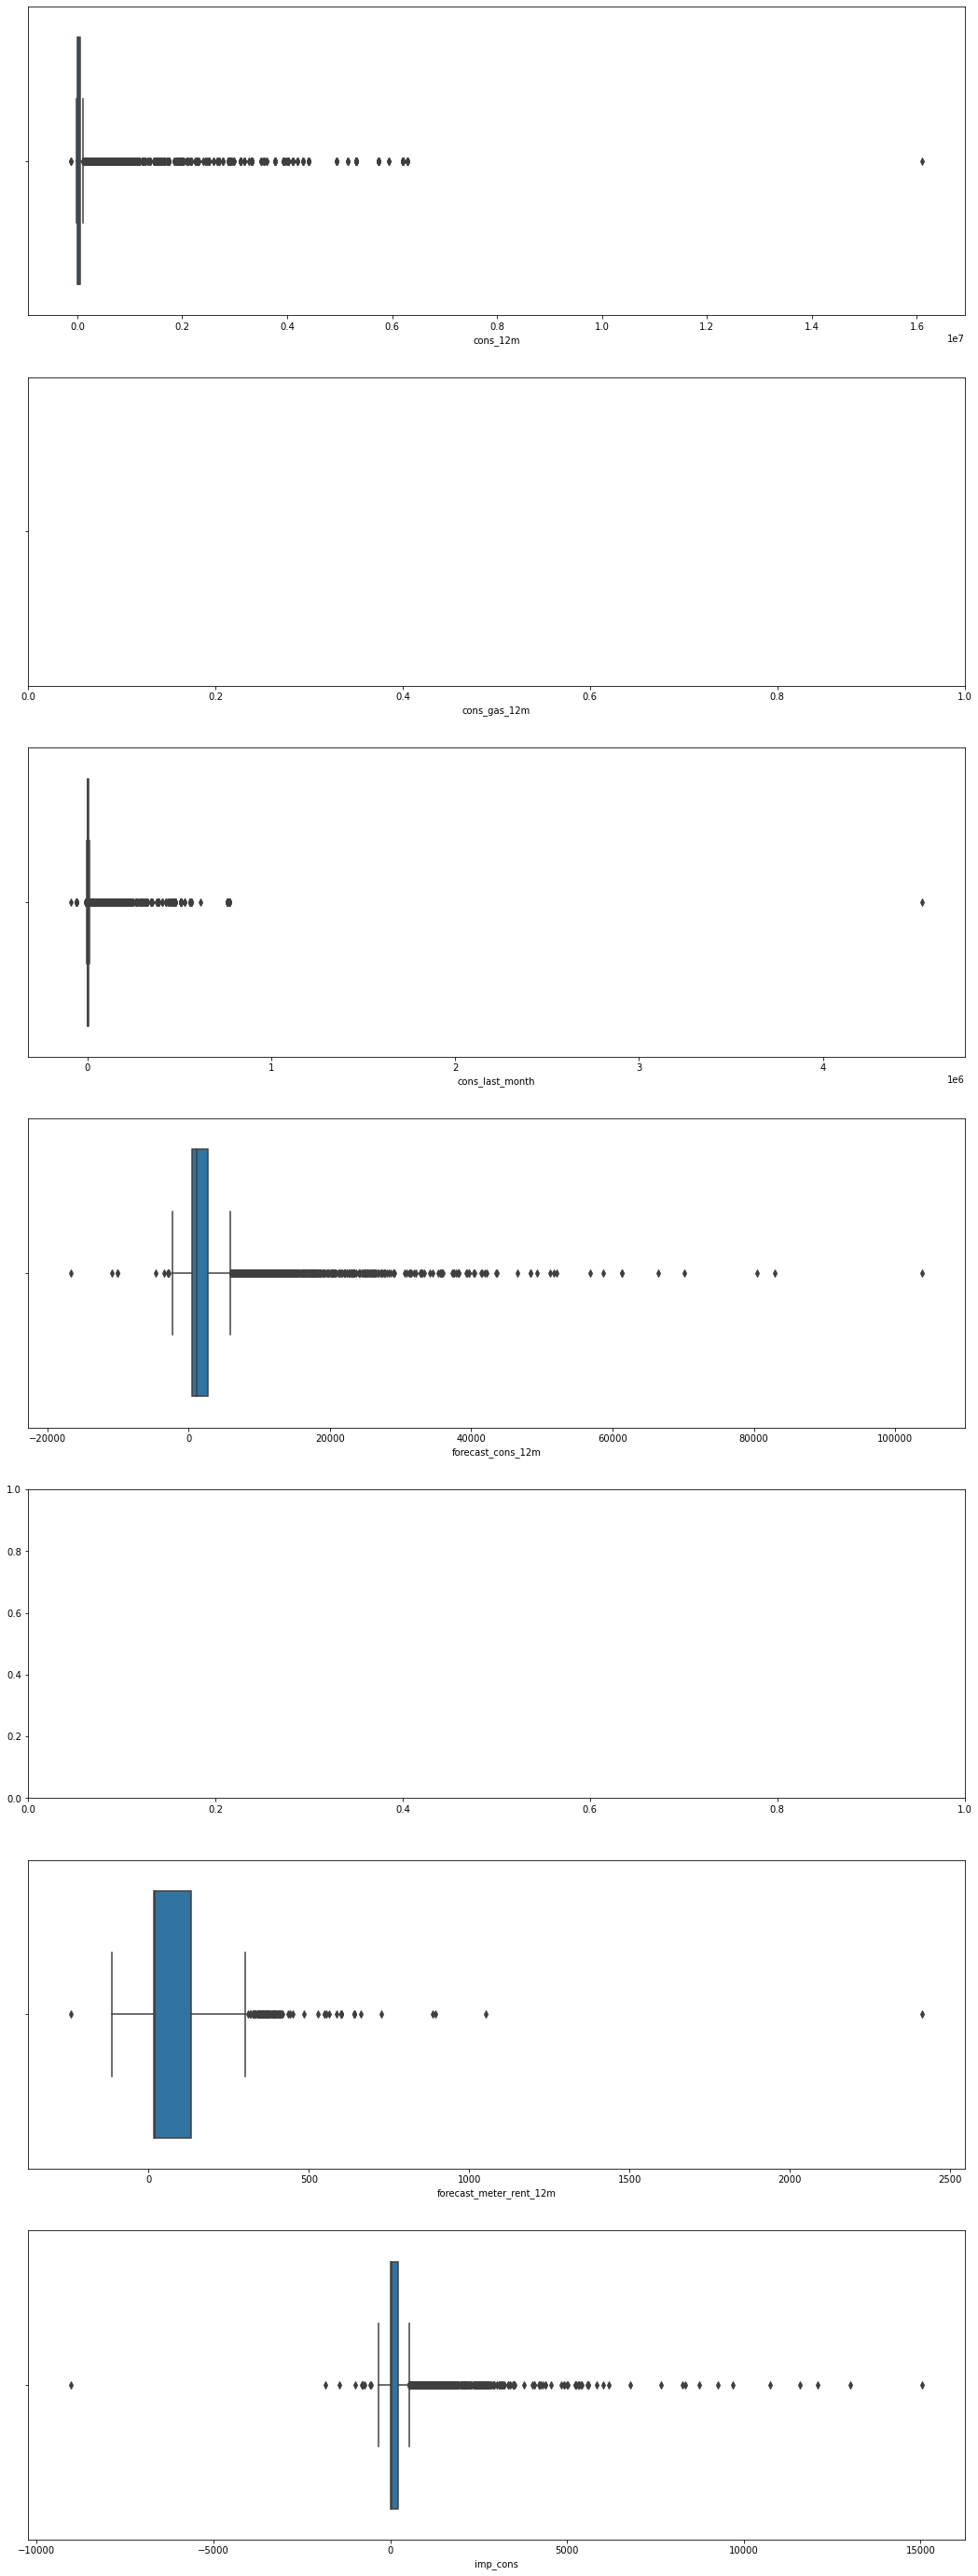

In [156]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

sns.boxplot(x = (data4["cons_12m"].dropna()), ax=axs[0])
sns.boxplot(x = (data4[data4["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot(x = (data4["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot(x = (data4["forecast_cons_12m"].dropna()), ax=axs[3])

sns.boxplot(x = (data4["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot(x = (data4["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [157]:
data2.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [158]:
data2.loc[data2["price_p1_fix"] < 0,"price_p1_fix"] = data2["price_p1_fix"].median()
data2.loc[data2["price_p2_fix"] < 0,"price_p2_fix"] = data2["price_p2_fix"].median()
data2.loc[data2["price_p3_fix"] < 0,"price_p3_fix"] = data2["price_p3_fix"].median()

In [ ]:
if not os.path.exists(os.path.join("..", "processed_data")):
    os.makedirs(os.path.join(".", "processed_data"))

In [159]:
data4_DIR = os.path.join(".", "processed_data", "data1.pkl")
data2_DIR = os.path.join(".", "processed_data", "data2.pkl")

In [160]:
pd.to_pickle(data4, data4_DIR)
pd.to_pickle(data2, data2_DIR)